# Verify AlphaFold accuracy for 100 targets
Subset: target_subset_how_eq_random_num_100_seed_0

Set the target numbers of `is_similar_AF2` and not `is_similar_AF2` equal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (5, 3)
from scipy import stats

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'accuracy'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
label_df

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
0       model_1_ptm_seed_0_rec_10_ens_1    0.981   0.965   0.857        0.899   
1       model_1_ptm_seed_0_rec_10_ens_8    0.981   0.966   0.859        0.900   
2        model_1_ptm_seed_0_rec_1_ens_1    0.980   0.965   0.852        0.901   
3        model_1_ptm_seed_0_rec_1_ens_8    0.980   0.964   0.856        0.899   
4        model_1_ptm_seed_0_rec_2_ens_1    0.980   0.961   0.852        0.900   
...                                 ...      ...     ...     ...          ...   
107795       model_5_seed_1_rec_7_ens_8    0.996   0.994   0.948        0.933   
107796       model_5_seed_1_rec_8_ens_1    0.996   0.993   0.949        0.935   
107797       model_5_seed_1_rec_8_ens_8    0.996   0.994   0.948        0.933   
107798       model_5_seed_1_rec_9_ens_1    0.996   0.993   0.948        0.937   
107799       model_5_seed_1_rec_9_ens_8    0.996   0.994   0.948        0.933   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  Seed  Recycle  \
0           0.894  0.936     0.892      0.084  model_1_ptm     0       10   
1           0.895  0.937     0.893      0.054  model_1_ptm     0       10   
2           0.896  0.928     0.887     26.445  model_1_ptm     0        1   
3           0.895  0.928     0.887     26.413  model_1_ptm     0        1   
4           0.895  0.933     0.890      0.391  model_1_ptm     0        2   
...           ...    ...       ...        ...          ...   ...      ...   
107795      0.930  0.874       NaN      1.251      model_5     1        7   
107796      0.931  0.880       NaN      0.277      model_5     1        8   
107797      0.929  0.872       NaN      0.574      model_5     1        8   
107798      0.933  0.887       NaN      0.334      model_5     1        9   
107799      0.929  0.873       NaN      0.471      model_5     1        9   

        Ensemble  Target  Num_diff  Num_missing  Length  
0              1  7DW4_A         0           15     235  
1              8  7DW4_A         0           15     235  
2              1  7DW4_A         0           15     235  
3              8  7DW4_A         0           15     235  
4              1  7DW4_A         0           15     235  
...          ...     ...       ...          ...     ...  
107795         8  7MT1_A         0           29     343  
107796         1  7MT1_A         0           29     343  
107797         8  7MT1_A         0           29     343  
107798         1  7MT1_A         0           29     343  
107799         8  7MT1_A         0           29     343  

[107800 rows x 17 columns]

In [4]:
target_df = pd.read_csv(target_list, index_col=0)
target_df

id  resolution           releasedate  \
0    7DW4_A       1.570  2021-08-04T00:00:00Z   
1    6DHP_o       2.040  2018-11-21T00:00:00Z   
2    6UVQ_A       1.840  2020-11-25T00:00:00Z   
3    6BNZ_A       1.450  2018-11-21T00:00:00Z   
4    5OJL_A       1.560  2018-05-30T00:00:00Z   
..      ...         ...                   ...   
295  7CFU_J       2.150  2021-06-30T00:00:00Z   
296  7BGG_A       1.040  2021-09-22T00:00:00Z   
297  6W9S_A       2.100  2020-07-01T00:00:00Z   
298  5ZMP_A       2.190  2019-02-06T00:00:00Z   
299  7MT1_A       1.300  2021-06-09T00:00:00Z   

                                                header  \
0    >7dw4_A mol:protein length:235  Glutathione S-...   
1    >6dhp_o mol:protein length:244  Photosystem II...   
2    >6uvq_A mol:protein length:268  D-glucose O-me...   
3    >6bnz_A mol:protein length:296  Lactoylglutath...   
4      >5ojl_A mol:protein length:298  Imine reductase   
..                                                 ...   
295  >7cfu_J mol:protein length:208  DNA/pantothena...   
296  >7bgg_A mol:protein length:245  heterocyclic t...   
297  >6w9s_A mol:protein length:179  OTU domain-con...   
298   >5zmp_A mol:protein length:307  lysine deacylase   
299  >7mt1_A mol:protein length:343  Platelet-activ...   

                                              sequence  length  \
0    HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...     235   
1    QTLTYDDIVGTGLANKCPTLDDTARGAYPIDSSQTYRIARLCLQPT...     244   
2    MTDISQMYDQLSDPFAGLGAGNIHLGYFDGPDDAATLAEAADRLTD...     268   
3    GSHMASMATGSEASKAAEAVVDWHKHDSKRMLHAVYRVGDLDRTIK...     296   
4    MATTTTTTKLTIFGLGAMGTAMATQFLKQGHTPTVWNRTAAKANPL...     298   
..                                                 ...     ...   
295  LVPRGSHMSERADGAQRALAQVRLLWGVCGSFSAVAVPHVNAWLRG...     208   
296  MGSSHHHHHHHHENLYFQSAGTESLDLEFESAYRGESVAFGEGVRP...     245   
297  SSPQSVFSDSVSSSRLELKKQIIKALDLDYWQGSGGEIMPLVLIDF...     179   
298  MIHLIYSDQFLDHGTGRSHPESARRLTAIAQALKAVSWANQIQWHE...     307   
299  MHHHHHHSSGRENLYFQGGQKRDPKEWIPRPPEKYALSGHRSPVTR...     343   

     num_entry_in_cluster  num_entry_in_cluster_AF2_notInclude  is_similar_AF2  
0                      89                                   13            True  
1                      91                                   34            True  
2                       8                                    3            True  
3                       4                                    3            True  
4                      61                                   29            True  
..                    ...                                  ...             ...  
295                    25                                   25           False  
296                     4                                    4           False  
297                     1                                    1           False  
298                     1                                    1           False  
299                     1                                    1           False  

[300 rows x 9 columns]

In [5]:
target_df['is_similar_AF2'].value_counts()

False    150
True     150
Name: is_similar_AF2, dtype: int64

In [6]:
df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
df

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
0       model_1_ptm_seed_0_rec_10_ens_1    0.981   0.965   0.857        0.899   
1       model_1_ptm_seed_0_rec_10_ens_8    0.981   0.966   0.859        0.900   
2        model_1_ptm_seed_0_rec_1_ens_1    0.980   0.965   0.852        0.901   
3        model_1_ptm_seed_0_rec_1_ens_8    0.980   0.964   0.856        0.899   
4        model_1_ptm_seed_0_rec_2_ens_1    0.980   0.961   0.852        0.900   
...                                 ...      ...     ...     ...          ...   
107795       model_5_seed_1_rec_7_ens_8    0.996   0.994   0.948        0.933   
107796       model_5_seed_1_rec_8_ens_1    0.996   0.993   0.949        0.935   
107797       model_5_seed_1_rec_8_ens_8    0.996   0.994   0.948        0.933   
107798       model_5_seed_1_rec_9_ens_1    0.996   0.993   0.948        0.937   
107799       model_5_seed_1_rec_9_ens_8    0.996   0.994   0.948        0.933   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...  Length  \
0           0.894  0.936     0.892      0.084  model_1_ptm  ...     235   
1           0.895  0.937     0.893      0.054  model_1_ptm  ...     235   
2           0.896  0.928     0.887     26.445  model_1_ptm  ...     235   
3           0.895  0.928     0.887     26.413  model_1_ptm  ...     235   
4           0.895  0.933     0.890      0.391  model_1_ptm  ...     235   
...           ...    ...       ...        ...          ...  ...     ...   
107795      0.930  0.874       NaN      1.251      model_5  ...     343   
107796      0.931  0.880       NaN      0.277      model_5  ...     343   
107797      0.929  0.872       NaN      0.574      model_5  ...     343   
107798      0.933  0.887       NaN      0.334      model_5  ...     343   
107799      0.929  0.873       NaN      0.471      model_5  ...     343   

            id  resolution           releasedate  \
0       7DW4_A       1.570  2021-08-04T00:00:00Z   
1       7DW4_A       1.570  2021-08-04T00:00:00Z   
2       7DW4_A       1.570  2021-08-04T00:00:00Z   
3       7DW4_A       1.570  2021-08-04T00:00:00Z   
4       7DW4_A       1.570  2021-08-04T00:00:00Z   
...        ...         ...                   ...   
107795  7MT1_A       1.300  2021-06-09T00:00:00Z   
107796  7MT1_A       1.300  2021-06-09T00:00:00Z   
107797  7MT1_A       1.300  2021-06-09T00:00:00Z   
107798  7MT1_A       1.300  2021-06-09T00:00:00Z   
107799  7MT1_A       1.300  2021-06-09T00:00:00Z   

                                                   header  \
0       >7dw4_A mol:protein length:235  Glutathione S-...   
1       >7dw4_A mol:protein length:235  Glutathione S-...   
2       >7dw4_A mol:protein length:235  Glutathione S-...   
3       >7dw4_A mol:protein length:235  Glutathione S-...   
4       >7dw4_A mol:protein length:235  Glutathione S-...   
...                                                   ...   
107795  >7mt1_A mol:protein length:343  Platelet-activ...   
107796  >7mt1_A mol:protein length:343  Platelet-activ...   
107797  >7mt1_A mol:protein length:343  Platelet-activ...   
107798  >7mt1_A mol:protein length:343  Platelet-activ...   
107799  >7mt1_A mol:protein length:343  Platelet-activ...   

                                                 sequence  length  \
0       HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...     235   
1       HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...     235   
2       HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...     235   
3       HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...     235   
4       HHHHHHMAKSDVKLLGAWPSPFVMRPRIALNIKSVEYEFLEETLGS...     235   
...                                                   ...     ...   
107795  MHHHHHHSSGRENLYFQGGQKRDPKEWIPRPPEKYALSGHRSPVTR...     343   
107796  MHHHHHHSSGRENLYFQGGQKRDPKEWIPRPPEKYALSGHRSPVTR...     343   
107797  MHHHHHHSSGRENLYFQGGQKRDPKEWIPRPPEKYALSGHRSPVTR...     343   
107798  MHHHHHHSSGRENLYFQGGQKRDPKEWIPRPPEKYALSGHRSPVTR...     343   
107799  MHHHHHHSSGRENLYFQGGQKRDPKEWIPRPPEKY

In [7]:
# Check target number
targets = df['Target'].unique().tolist()
print(len(targets))

300


In [8]:
# Check target number that does not have LDDT score
df.groupby('Target').head(1)['Global_LDDT'].isnull().sum()

28

## Model Quality

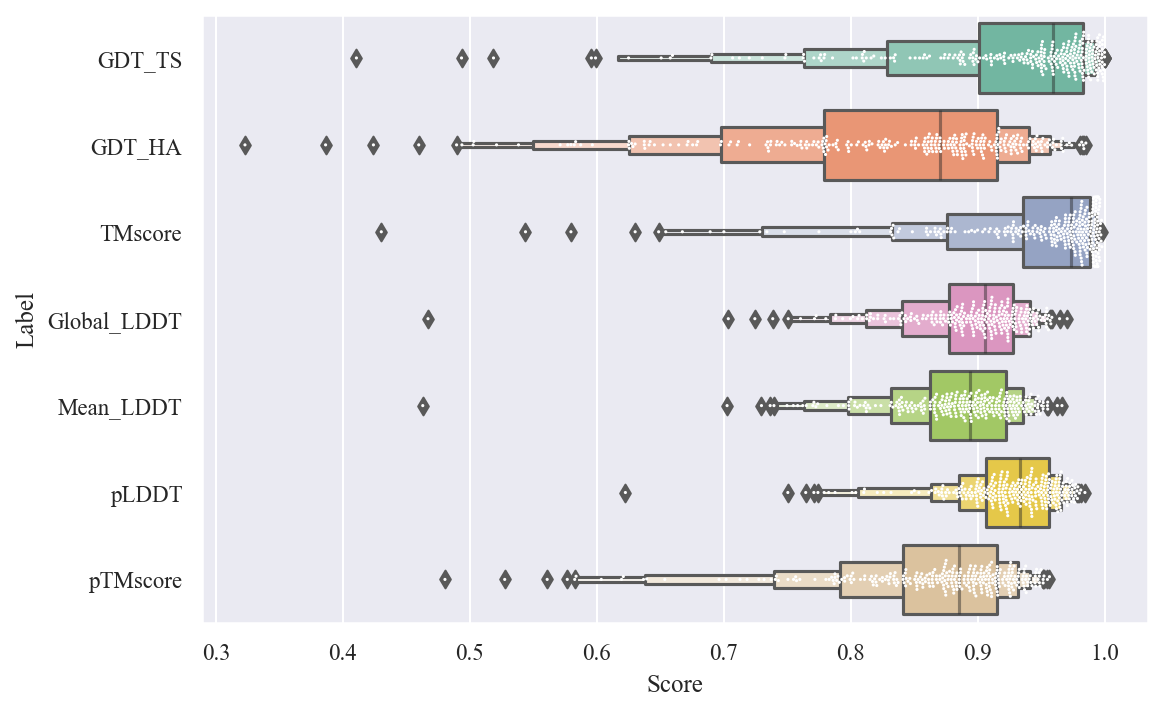

In [9]:
# max value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
# xticks_max = 1.1
# plt.xlim(None, 1.15)
# xticks = np.append(np.arange(0.2, 1.2, 0.2), [xticks_max])
# xticks_str = list(map(lambda x: str(x)[:3], xticks))
# xticks_str[-1] = 'Mean'
# plt.xticks(xticks, xticks_str)
# plt.axvline(x=xticks_max, color=(234/255, 234/255, 242/255))
# mean_series = label_max_df.groupby('Label').mean()['Score']
# for i, label in enumerate(labels):
#     value = mean_series[label]
#     plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
plt.savefig(fig_dir / 'max_value_each_labels.png')


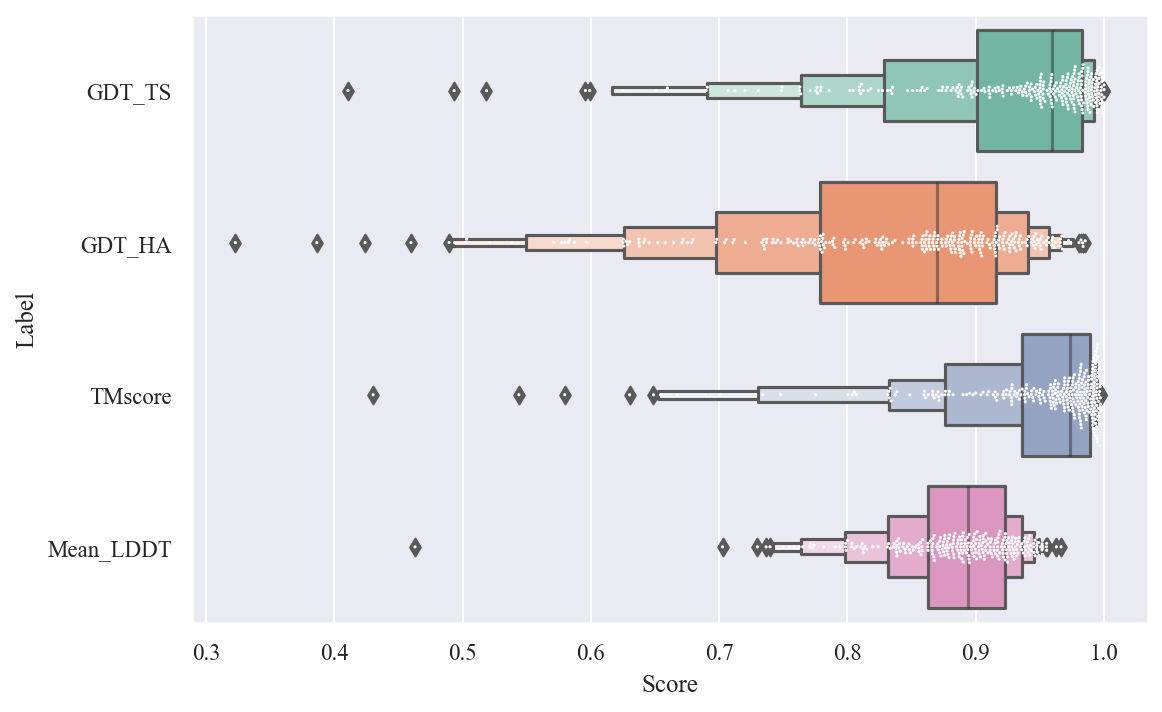

In [10]:
# max value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
# xticks_max = 1.1
# plt.xlim(None, 1.15)
# xticks = np.append(np.arange(0.2, 1.2, 0.2), [xticks_max])
# xticks_str = list(map(lambda x: str(x)[:3], xticks))
# xticks_str[-1] = 'Mean'
# plt.xticks(xticks, xticks_str)
# plt.axvline(x=xticks_max, color=(234/255, 234/255, 242/255))
# mean_series = label_max_df.groupby('Label').mean()['Score']
# for i, label in enumerate(labels):
#     value = mean_series[label]
#     plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
# plt.savefig(fig_dir / 'max_value_each_labels.png')

### Verify whether the quality of the predicted structure changes between targets that have similar sequences in the AlphaFold training data and targets that do not

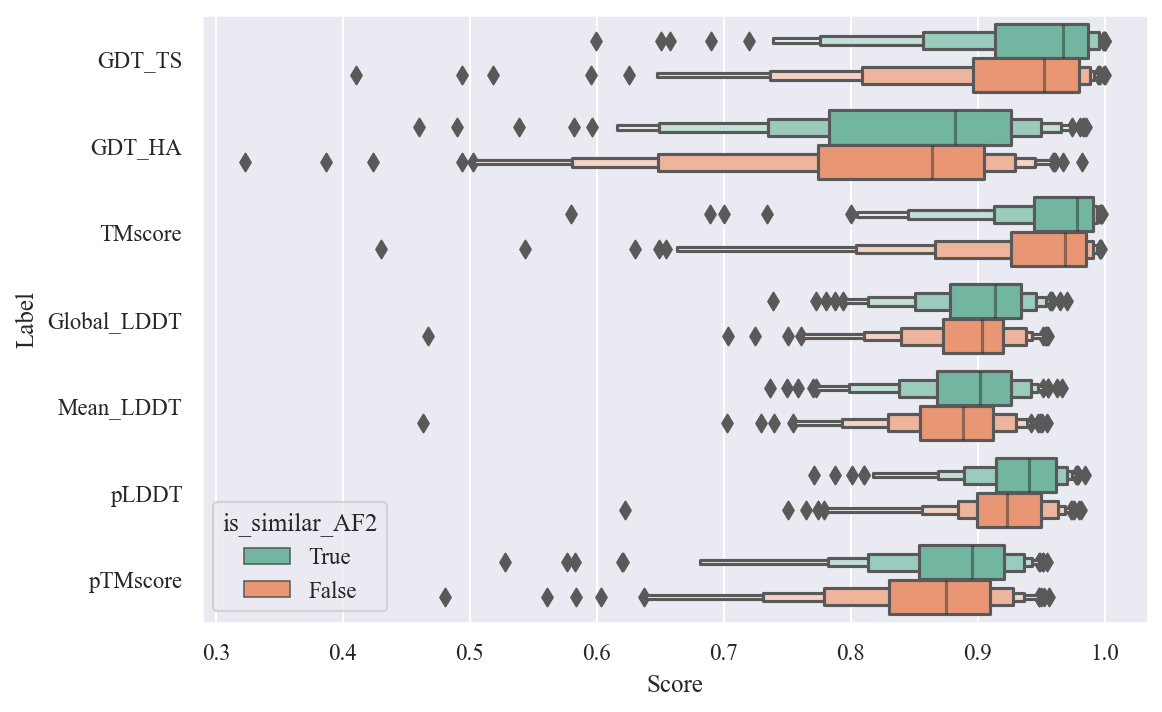

In [11]:
# max value for each label
# Targets whose similar sequence is included in AF2 training dataset or not
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2', hue='is_similar_AF2', hue_order=[True, False])
plt.tight_layout()
plt.savefig(fig_dir / 'max_value_each_labels_similar_training.png')

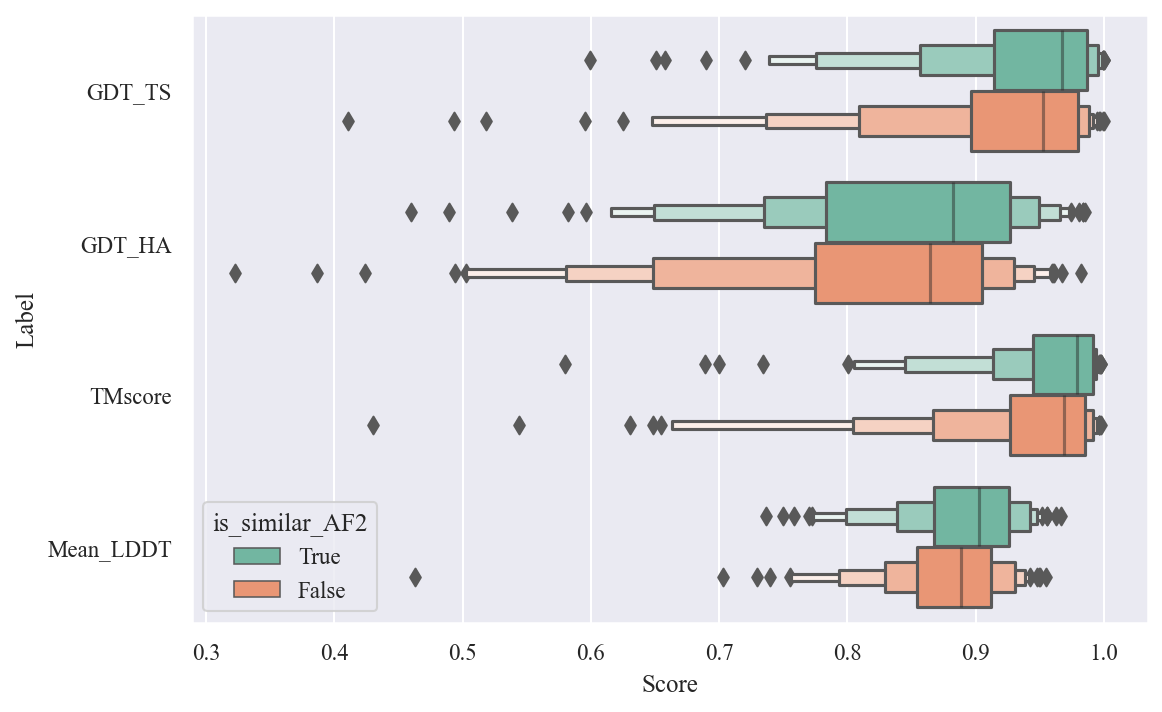

In [12]:
# max value for each label
# Targets whose similar sequence is included in AF2 training dataset or not
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    data=df.groupby('Target').max(label)
    data['Score'] = data[label]
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2', hue='is_similar_AF2', hue_order=[True, False])
plt.tight_layout()
# plt.savefig(fig_dir / 'max_value_each_labels_similar_training.png')

In [13]:
# Statistical test
similar_df = label_max_df[label_max_df['is_similar_AF2'] == True]
not_similar_df = label_max_df[label_max_df['is_similar_AF2'] == False]
for label in labels:
    print(label)
    x = similar_df.query('Label == @label')['Score']
    y = not_similar_df.query('Label == @label')['Score']
    print(f'{x.mean():.3f}, {y.mean():.3f}')
    result = stats.mannwhitneyu(x, y)
    print(result)

GDT_TS
0.936, 0.916
MannwhitneyuResult(statistic=9596.0, pvalue=0.013867564772640813)
GDT_HA
0.848, 0.819
MannwhitneyuResult(statistic=9638.5, pvalue=0.01599917196702751)
TMscore
0.955, 0.935
MannwhitneyuResult(statistic=9439.0, pvalue=0.007976211540809314)
Mean_LDDT
0.891, 0.877
MannwhitneyuResult(statistic=9830.0, pvalue=0.029411086937788423)


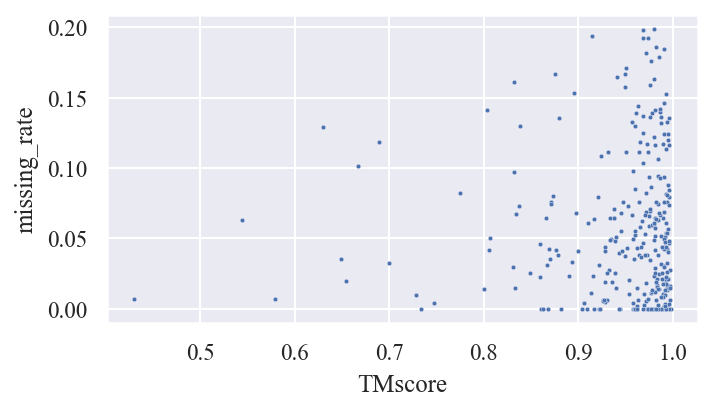

In [14]:
# Relationship between TMscore and ratio of missing residues
max_tmscore_df = df.groupby('Target').max('TMscore')
max_tmscore_df['missing_rate'] = max_tmscore_df['Num_missing'] / max_tmscore_df['Length']
sns.scatterplot(data=max_tmscore_df, x='TMscore', y='missing_rate', s=5)
plt.tight_layout()

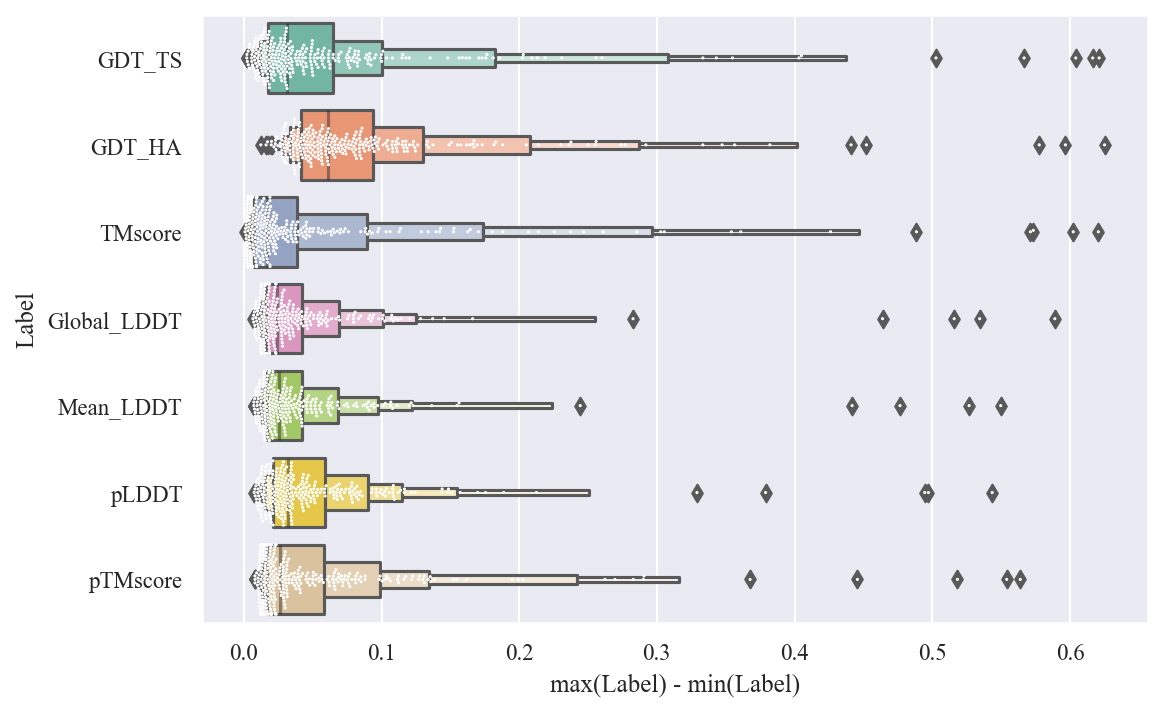

In [15]:
# max value - min value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    value=df.groupby('Target').max(label)[label] - df.groupby('Target').min(label)[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel(f'max(Label) - min(Label)')
plt.tight_layout()
plt.savefig(fig_dir / 'max_minus_min_each_labels.png')

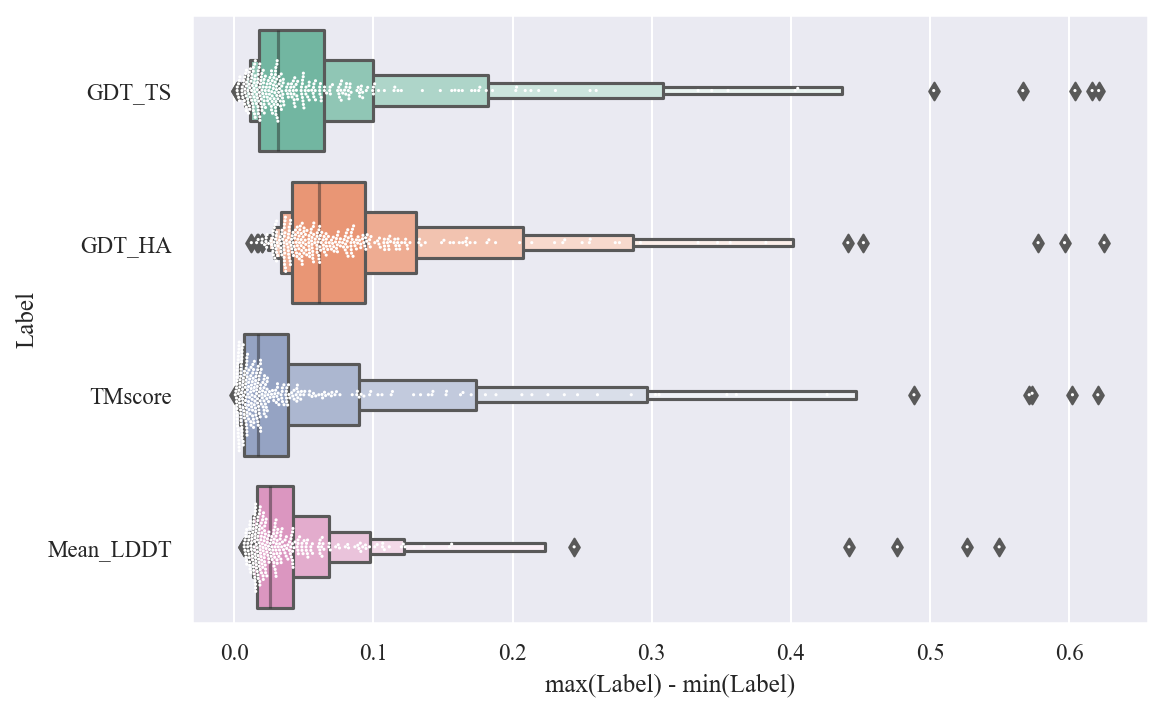

In [16]:
# max value - min value for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    value=df.groupby('Target').max(label)[label] - df.groupby('Target').min(label)[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel(f'max(Label) - min(Label)')
plt.tight_layout()
# plt.savefig(fig_dir / 'max_minus_min_each_labels.png')

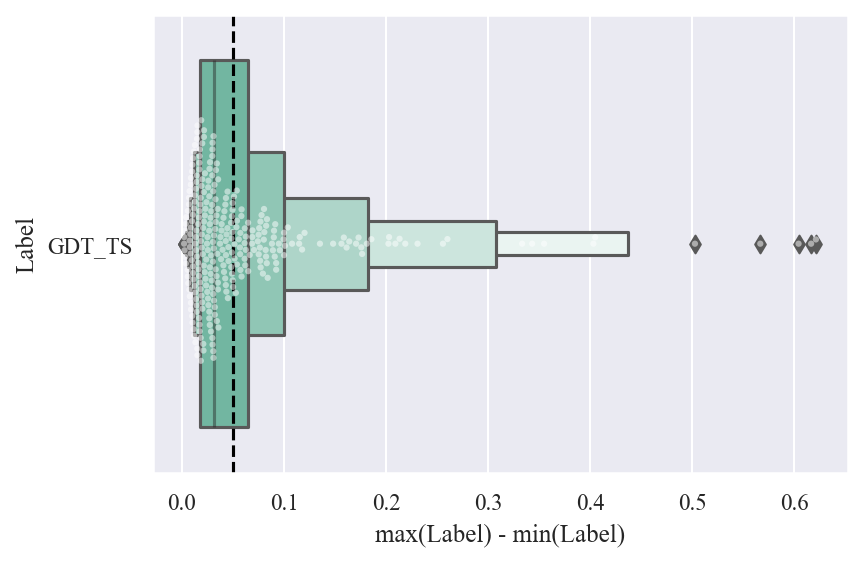

In [17]:
# max value - min value for each label
label_max_datas = []
labels = ['GDT_TS']
# labels = ['GDT_TS', 'GDT_HA', 'TMscore']
for label in labels:
    value=df.groupby('Target').max(label)[label] - df.groupby('Target').min(label)[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(6, 4))
# plt.axvline(x=0.05, color='black', linestyle='--')
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=3, alpha=0.5)
plt.axvline(x=0.05, color='black', linestyle='--')
plt.xlabel(f'max(Label) - min(Label)')
plt.tight_layout()
# plt.savefig(fig_dir / 'max_minus_min_each_labels.png')

In [18]:
# Count target number whose value difference between max and min is larger than threshold
label = 'GDT_TS'
fil_df = df.groupby('Target').filter(lambda x: x[label].max() - x[label].min() >= 0.05)
print(fil_df['Target'].unique().size)
print(fil_df.groupby('Target').head(1)['is_similar_AF2'].value_counts())

99
False    53
True     46
Name: is_similar_AF2, dtype: int64


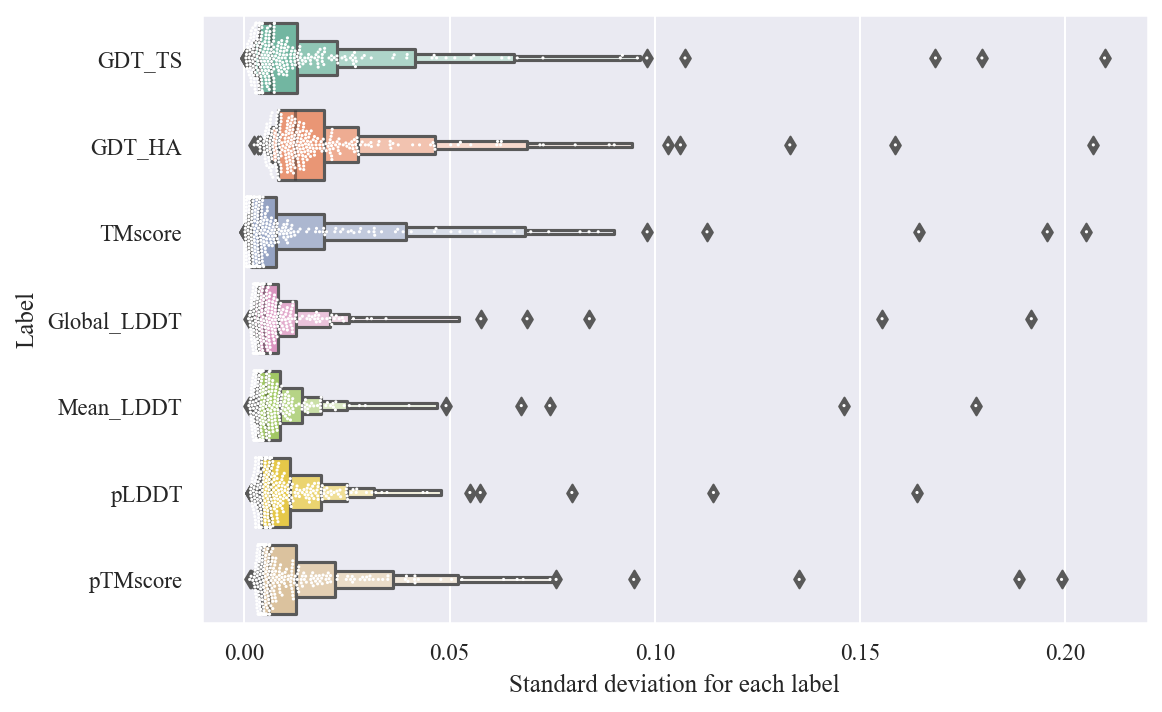

In [19]:
# Standard deviation for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Global_LDDT', 'Mean_LDDT', 'pLDDT', 'pTMscore']
for label in labels:
    value=df.groupby('Target').std()[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel('Standard deviation for each label')
plt.tight_layout()
plt.savefig(fig_dir / 'std_each_labels.png')

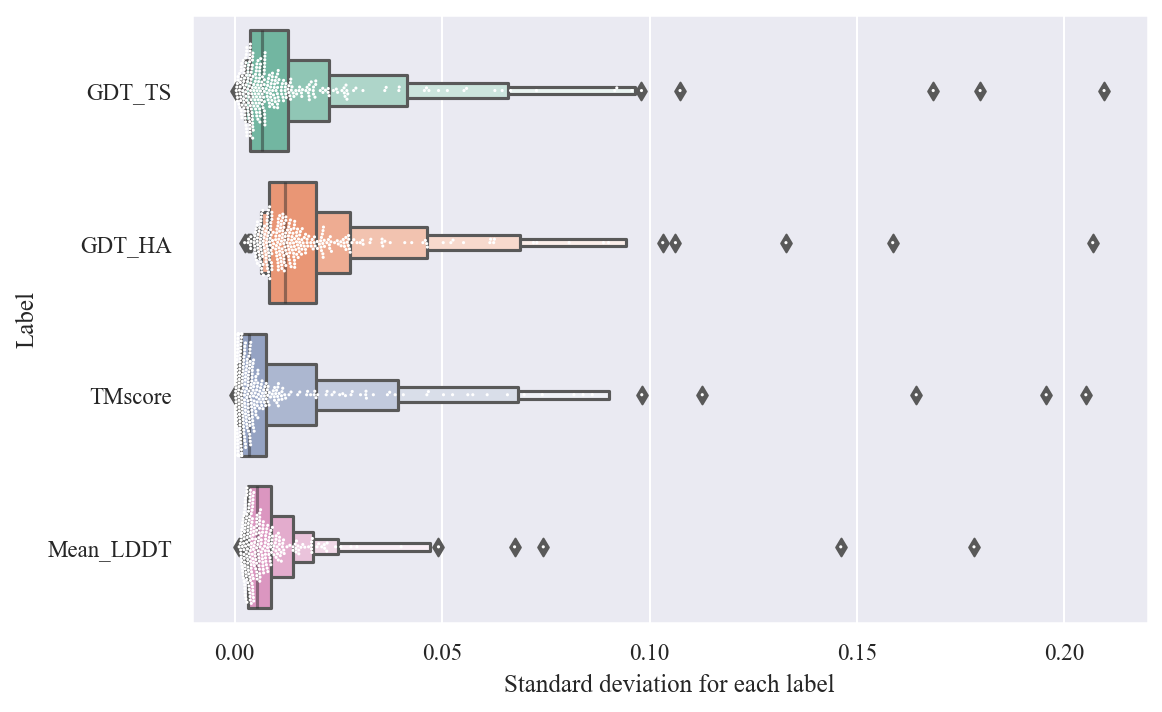

In [20]:
# Standard deviation for each label
label_max_datas = []
labels = ['GDT_TS', 'GDT_HA', 'TMscore', 'Mean_LDDT']
for label in labels:
    value=df.groupby('Target').std()[label]
    data = pd.DataFrame(value)
    data['Score'] = data
    data['Label'] = label
    label_max_datas.append(data)
label_max_df = pd.concat(label_max_datas)
plt.figure(figsize=(8, 5))
sns.boxenplot(data=label_max_df, x='Score', y='Label', palette='Set2')
sns.swarmplot(data=label_max_df, x='Score', y='Label', color='white', s=1.5)
plt.xlabel('Standard deviation for each label')
plt.tight_layout()
# plt.savefig(fig_dir / 'std_each_labels.png')

## Verify pLDDT and pTM

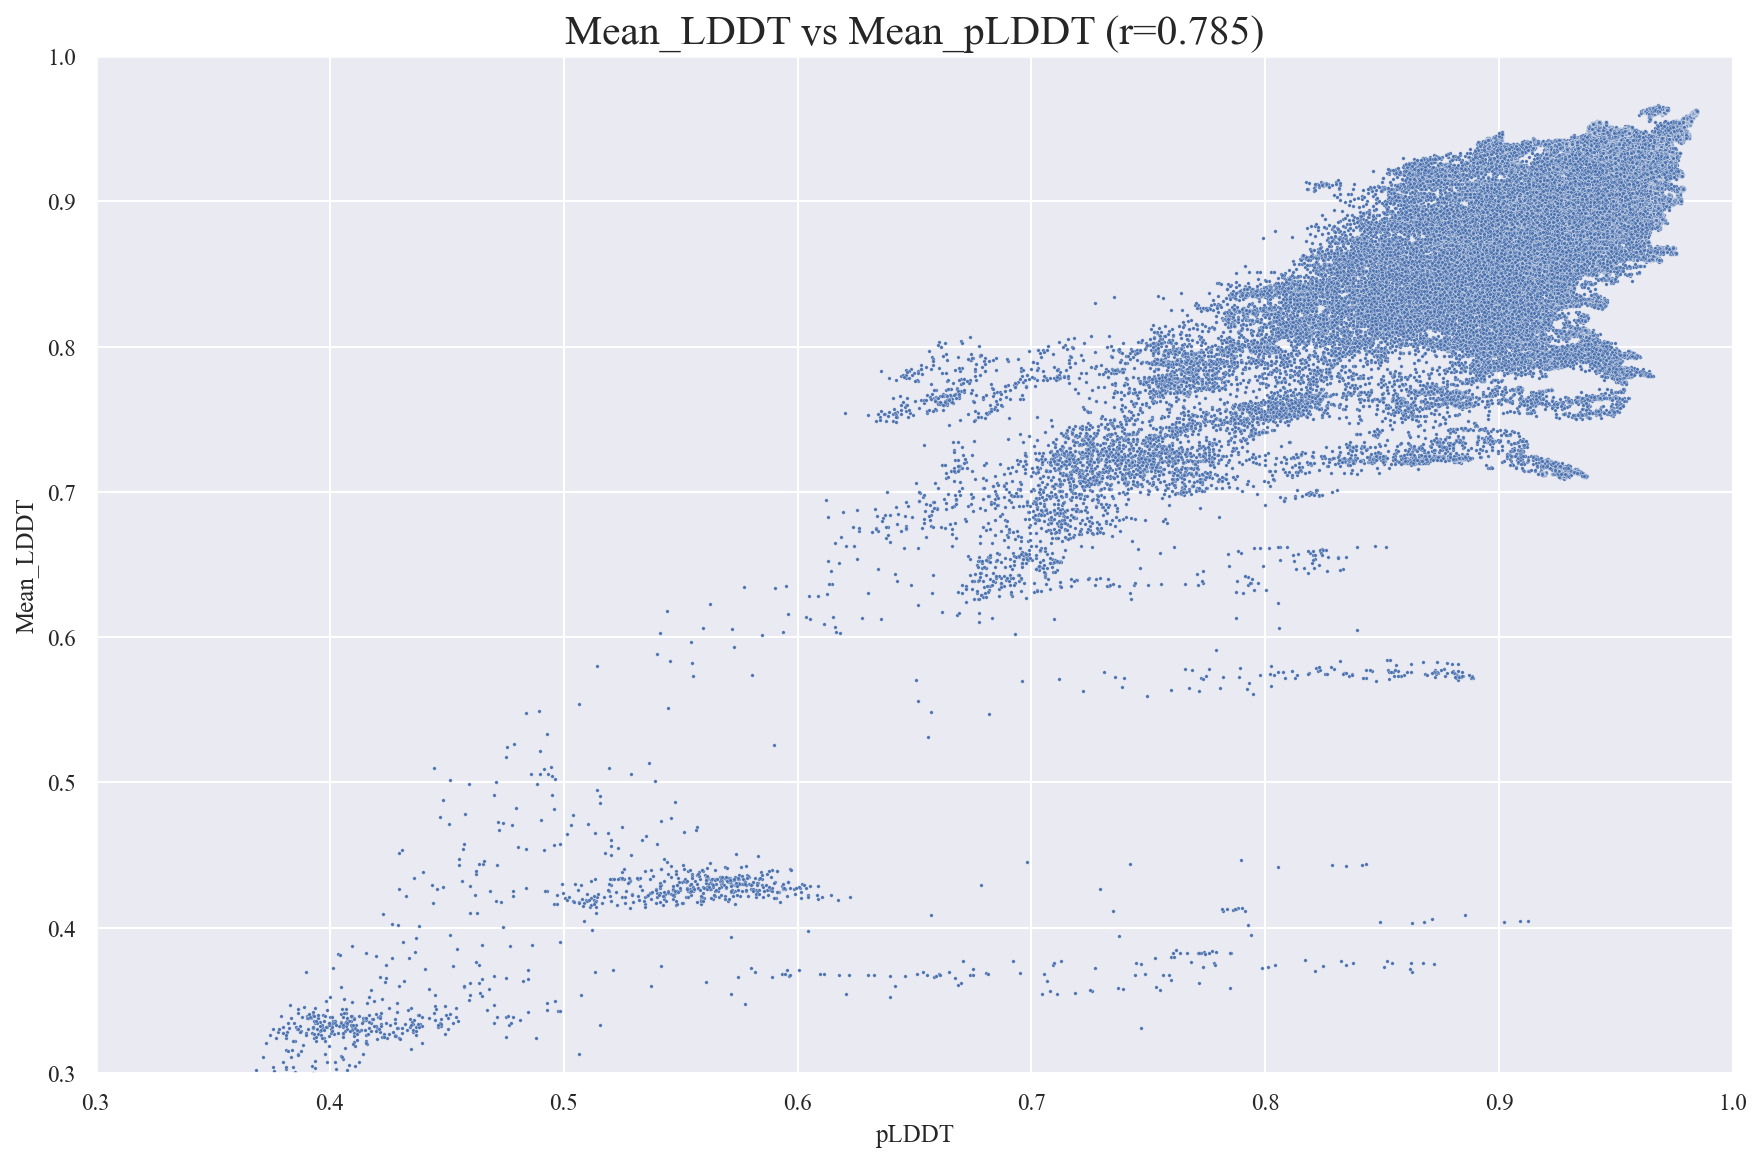

In [21]:
# Mean pLDDT vs Mean LDDT
label = 'Mean_LDDT'
score = 'pLDDT'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0.3, 1.0)
plt.ylim(0.3, 1.0)
plt.title(f'{label} vs Mean_{score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')


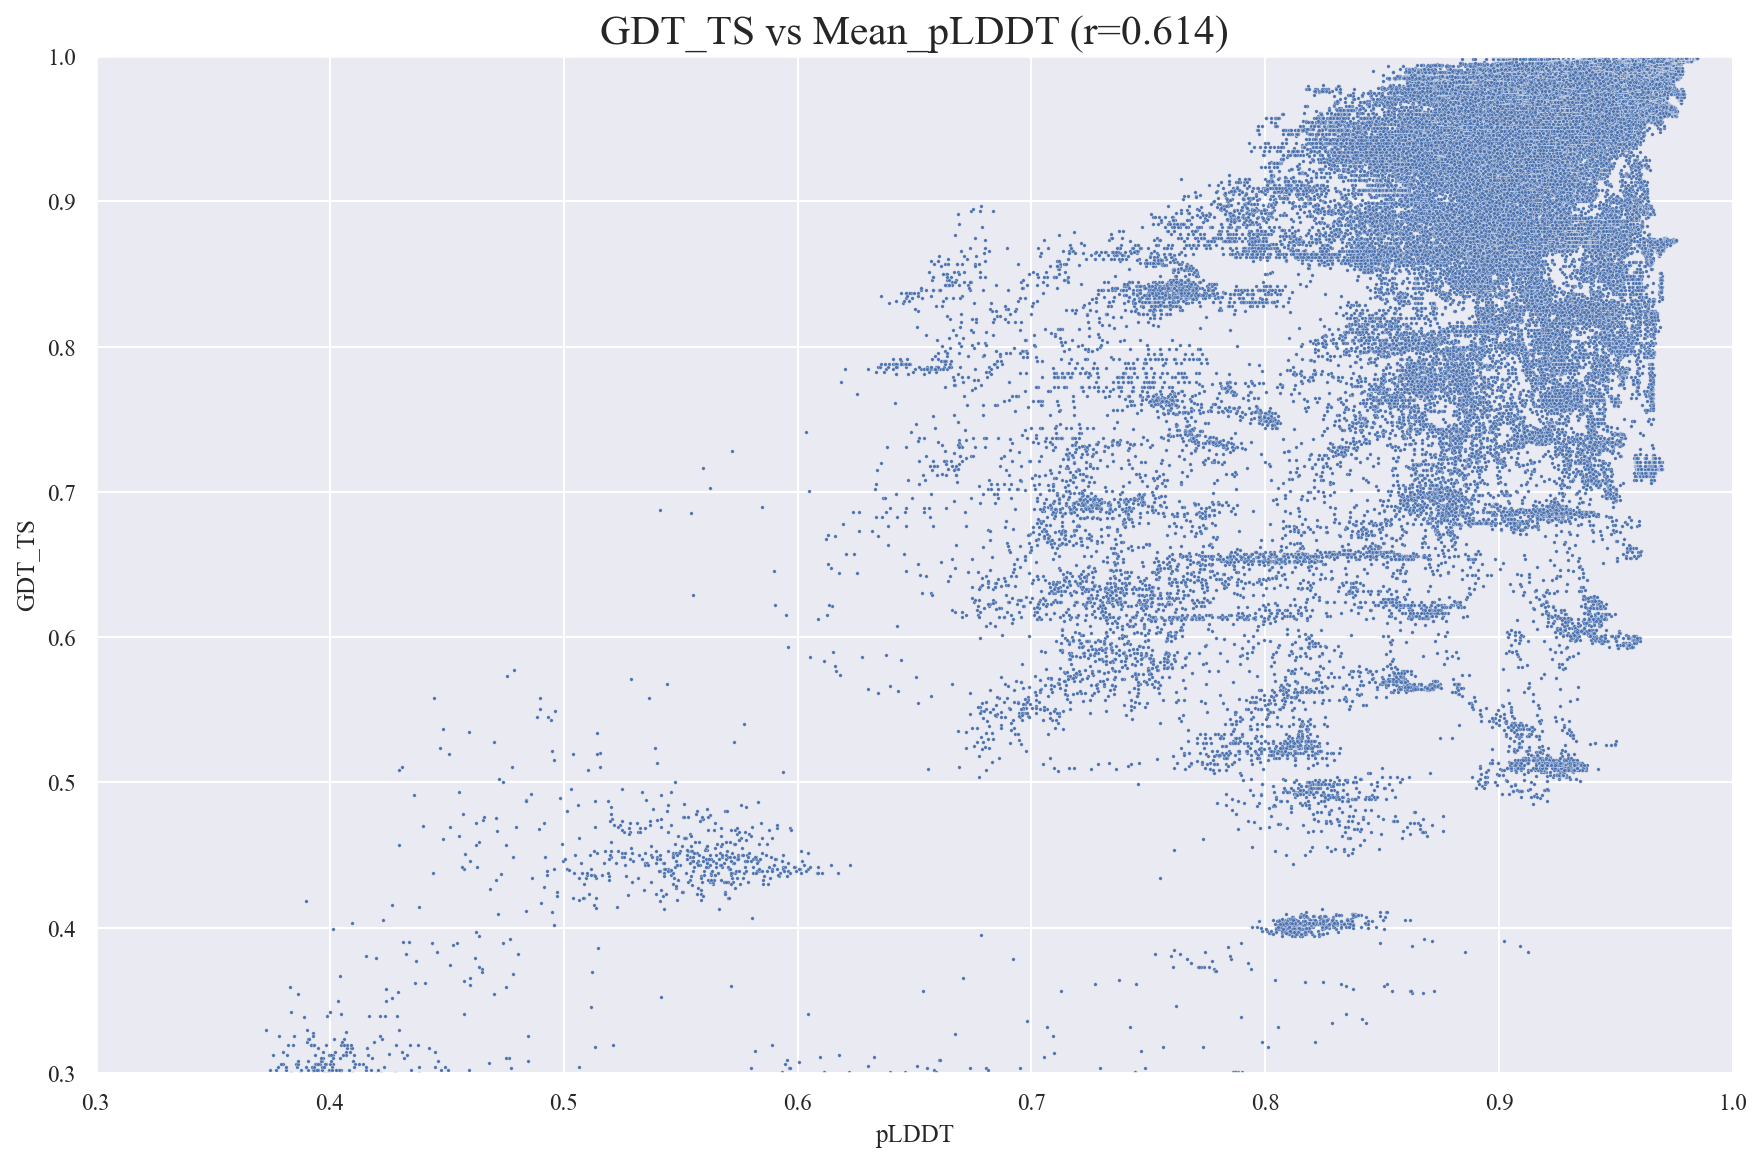

In [22]:
# Mean pLDDT vs GDT_TS
label = 'GDT_TS'
score = 'pLDDT'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0.3, 1.0)
plt.ylim(0.3, 1.0)
plt.title(f'{label} vs Mean_{score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')


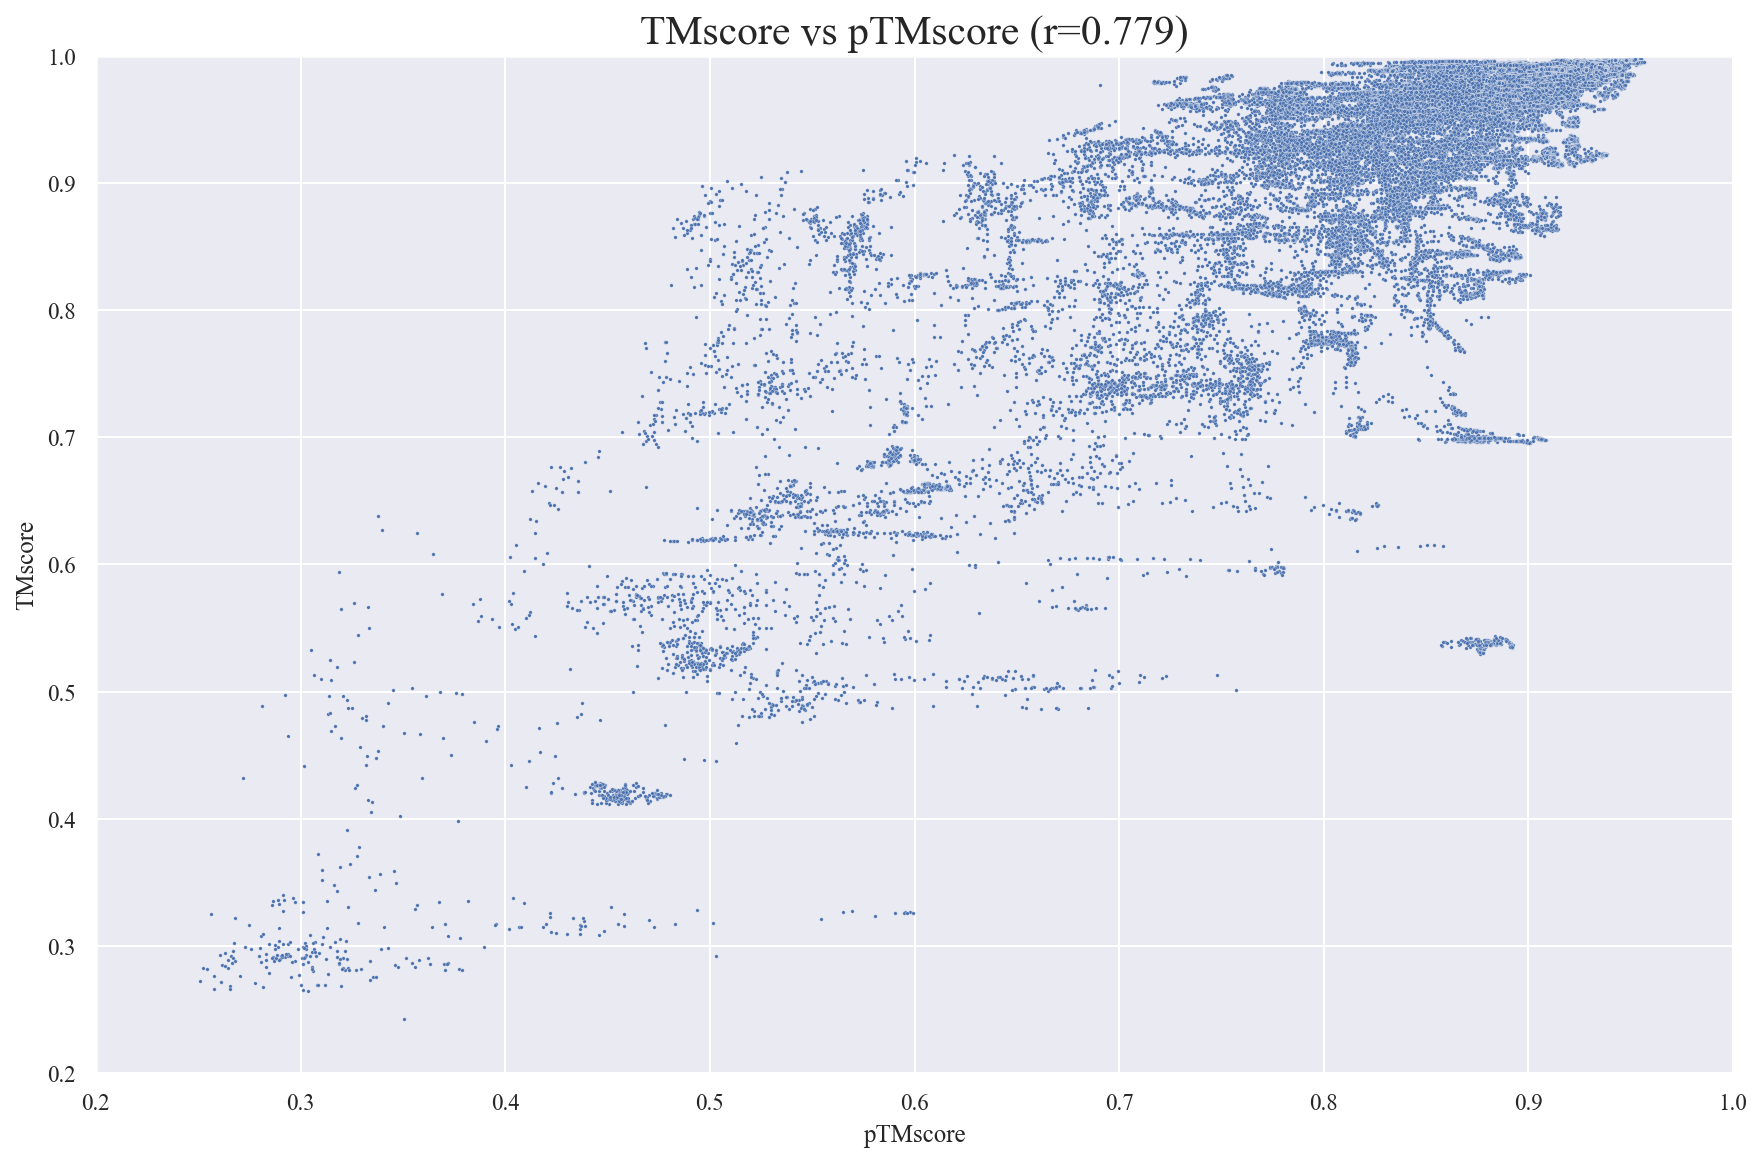

In [23]:
# pTMscore vs TMscore
label = 'TMscore'
score = 'pTMscore'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0.2, 1.0)
plt.ylim(0.2, 1.0)
plt.title(f'{label} vs {score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')

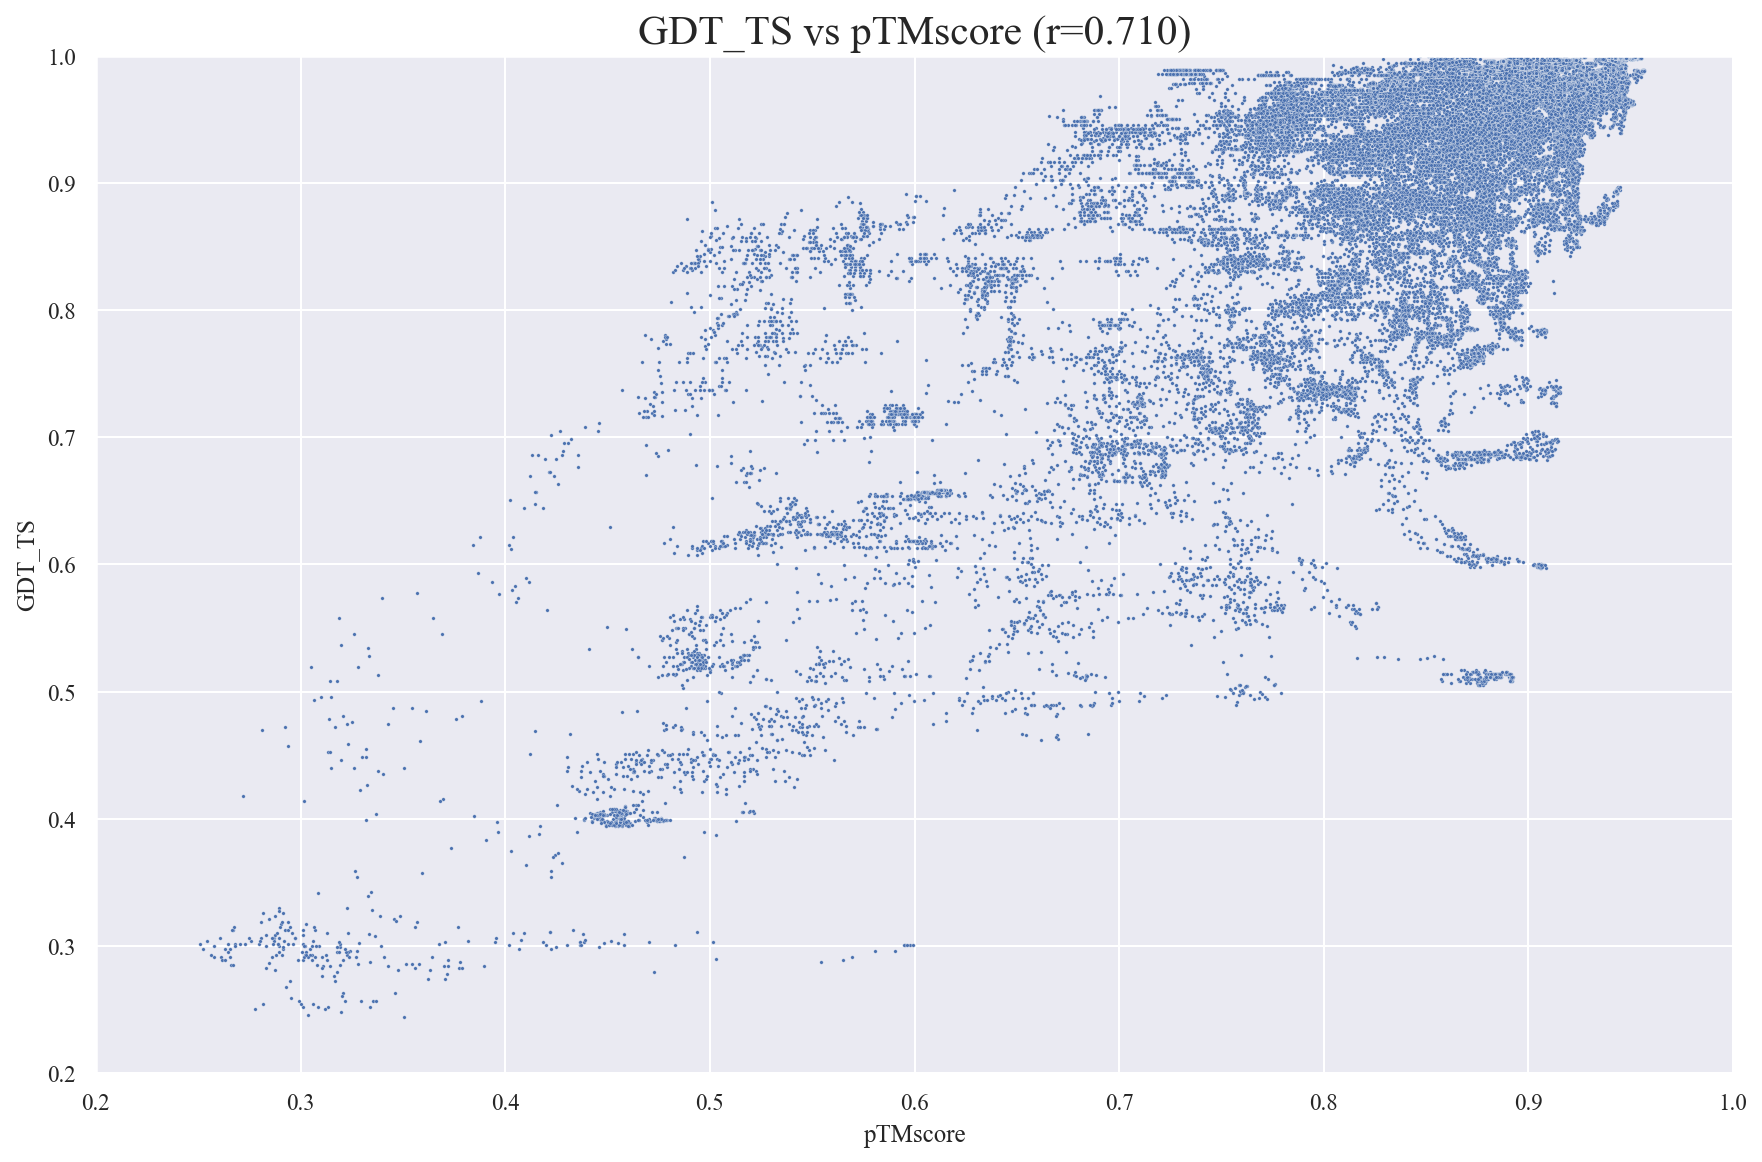

In [24]:
# pTMscore vs GDT_TS
label = 'GDT_TS'
score = 'pTMscore'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x=score, y=label, s=3)
cc = df.corr()[label][score]
plt.xlim(0.2, 1.0)
plt.ylim(0.2, 1.0)
plt.title(f'{label} vs {score} (r={cc:.3f})', fontsize=20)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{score}_{label}.png')

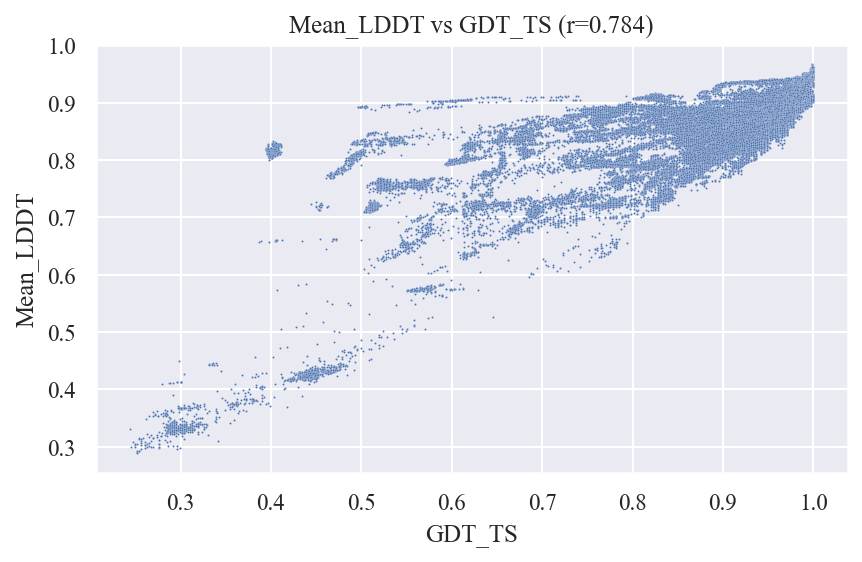

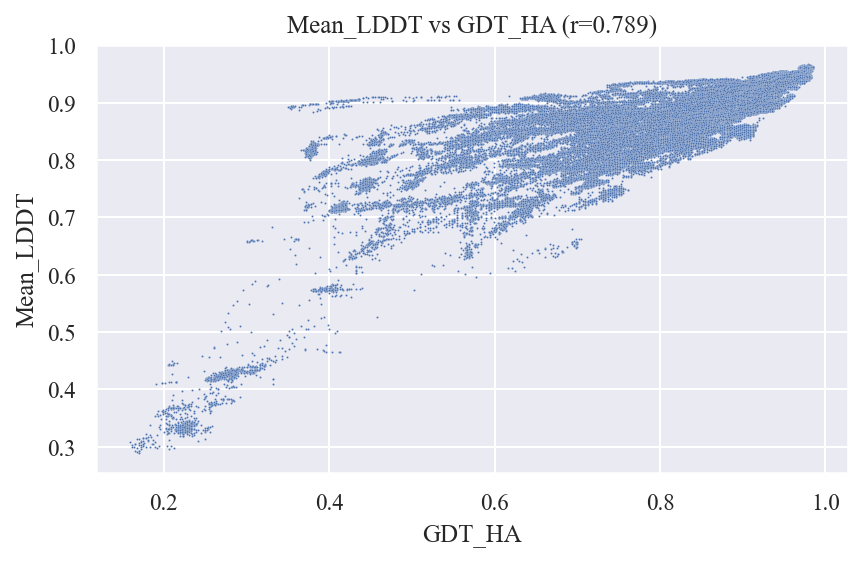

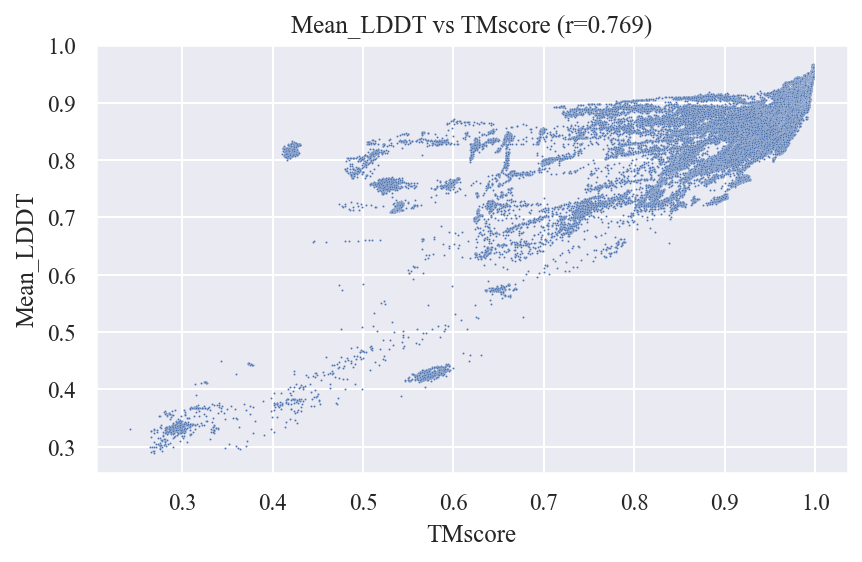

In [25]:
# Global score vs Mean local score
label = 'Mean_LDDT'
for label2 in ['GDT_TS', 'GDT_HA', 'TMscore']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=label2, y=label, s=1)
    cc = df.corr()[label][label2]
    plt.title(f'{label} vs {label2} (r={cc:.3f})')
    plt.tight_layout()
    plt.show()

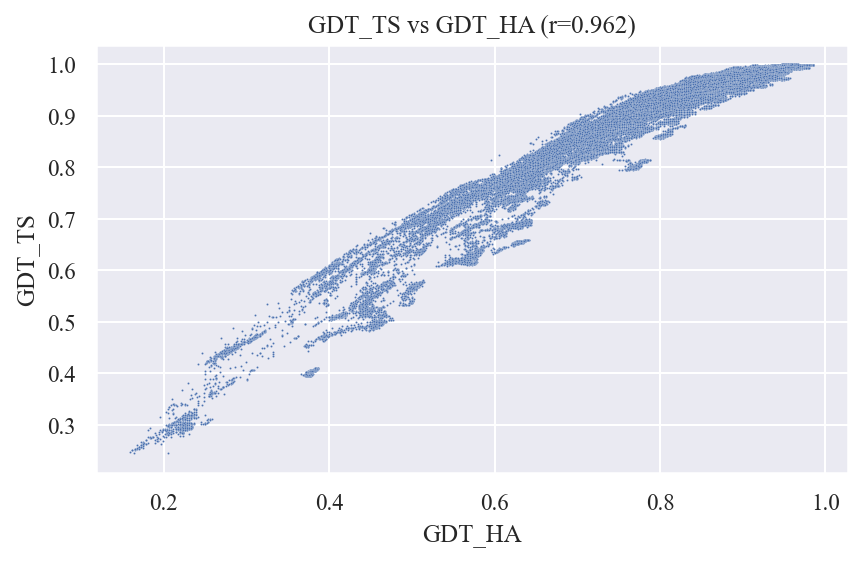

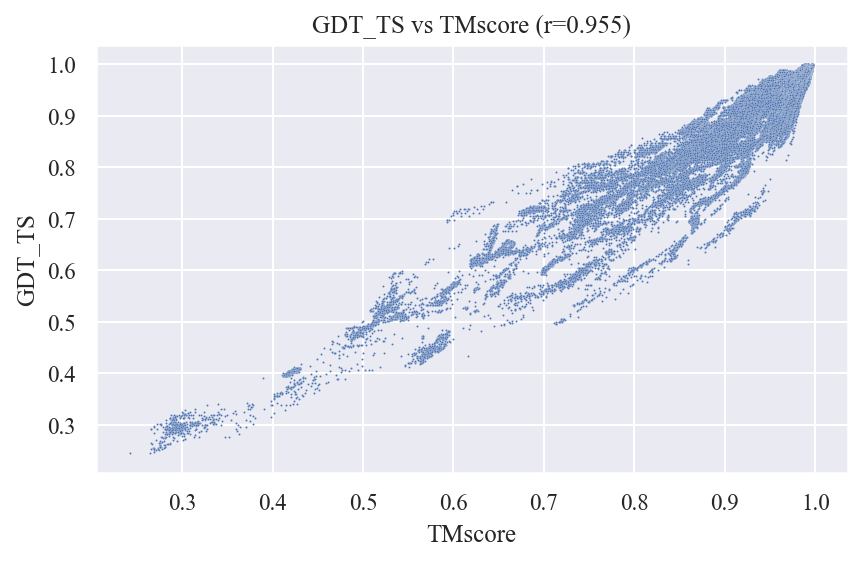

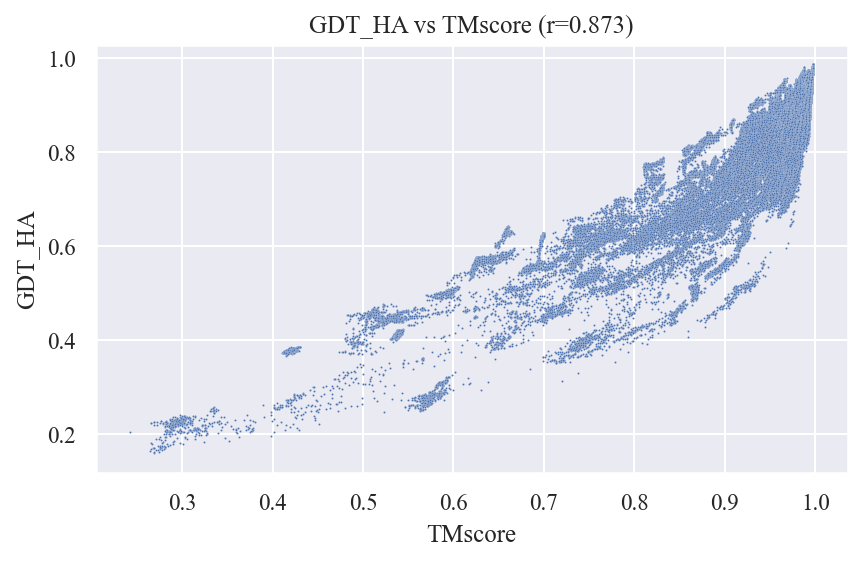

In [26]:
# Correlation between global labels
global_labels = ['GDT_TS', 'GDT_HA', 'TMscore']
for i, label1 in enumerate(global_labels):
    for label2 in global_labels[i + 1:]:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(data=df, x=label2, y=label1, s=1)
        cc = df.corr()[label1][label2]
        plt.title(f'{label1} vs {label2} (r={cc:.3f})')
        plt.tight_layout()
    plt.show()